# Expected Value

After another semester of CSU, Chico's MATH 350 Introduction to Probability and Statistics, I feel like I'm still refining my explanation of a core topic of the course: expected value.  This blog post seeks to offer some intuition behind expected value, skipping the details of absolute convergence and measure theory, while adopting what I'd like my notation to be in future versions of this course; call this blog post a lesson in a future MATH 350.

## Defintion

Let $X$ be a random variable with distribution function $F$ and probability density function $f$.  The expected value of the function $g$ applied to the random variable $X$, namely $g(X)$, is given by

$$ \mathbb{E}(g(X)) = \int_{\mathbb{R}} g(x)dF(x) $$

This is fancy notation reminds us that when $X$ is a discrete random variable the integral becomes a sum, and when $X$ is continuous the integral stays.  In both cases, to evaluate this expression, the probability density funciton is multiplied (weighted) by the function $g$.  For instance, in the discrete case

$$ \mathbb{E}(g(X)) = \sum g(x) f(x) $$

# Motivation

This blog post will use Python 3.6 to explore the intuition behind expected value.  Let's load some useful packages for this endeavor and then immediately ditch that formula above and deal with something we all are (likely to be) more comfortable with, the mean.  

In [30]:
import numpy as np
from scipy.stats import binom, norm
import bplot as bp
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

We will begin with two examples where $g$ is the identity function, $g(x) = x$.  This will correspond to the mean of the random variable.  

It seems these days the (sample) mean has become more of a process than an abstract mathematical idea; add up all the numbers and divide by however many there are.  For us, the sample mean is a simple starting point.  The mean is a representation of the middle of the data, and the expected value with $g(x) = x$ gives the mean of the random variable.  We'll use the fact that the sample mean estimates, based on some data, the expected value of the random variable.

## Binomial Distribution

Sample means are as simple as they were in high school.  The only difference here is that we now pick a distribution to sample data from, the binomial, and the binomial distribution has parameters to instantiate a specific random variable, $k$ and $p$.  The seed part of the code below enables the exact same code to produce the exact same results in an independent Python session.

In [31]:
np.random.seed(350)
k = 5; p = 0.5 # parameters
x = np.random.binomial(k, p, 10)
print(x)
print(x.mean())

[2 3 4 2 3 1 2 3 2 4]
2.6


If, in your own Python session, you ran the exact code above, you too should get the same sequence of 10 numbers, from the $\text{Binomial}(k = 5, p = .5)$ distribution, that sum to 26.  Since there are 10 numbers, dividing by 10 calculates the sample mean, $2.6$.

In the case of discrete random variables, the formula for the sample mean is estimating the expected value of the random variable $X \sim \text{Binomial}(5, .5)$ by first calculating approximate frequencies of the density function $f$ at each value the random variable takes on $x = 0,1,2,3,4,5$.  Let's generate more than 10 random variables from $X$ to see how this works.

In [49]:
N = 1000
# by not setting a seed, these numbers will vary each time you rerun the code
x = np.random.binomial(k, p, N)
Px = np.histogram(x, bins=6)[0]/N # approximately P(X = x) for x = 0, 1, 2, 3, 4, 5
Px

array([0.026, 0.163, 0.307, 0.317, 0.161, 0.026])

These are estimated frequencies based on 1000 random variables from $\text{Binomial}(5, 0.5)$.  They are estimating the true frequencies displayed below.  As $N$ increases towards infinity, the estimated frequencies will converge to the true frequencies.  Convince yourself by increasing $N$ (above) to 5000, 10000, and then 50000.

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


Text(0, 0.5, '$f(x)$')

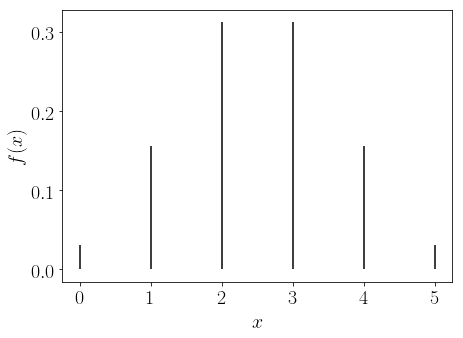

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
print(binom.pmf(np.array([0, 1, 2, 3, 4, 5]), k, p))
ax.vlines(np.array([0, 1, 2, 3, 4, 5]), 0, binom.pmf(np.array([0, 1, 2, 3, 4, 5]), k, p), 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')

Notice that our choice of random variable $X$ is symmetric.  So we anticipate that the expected value of $X$, namely $\mathbb{E}(X)$, will be right in the middle of the support of the random variable.  With $X \sim \text{Binomial}(5, 0.5)$, $\mathbb{E}(X) = 2.5$.

Indeed, the sample mean is very close to $2.5$ based on the $N = 1000$ random data drawn from $\text{Binomial}(5, 0.5)$.

In [50]:
np.mean(x)

2.502

The sample mean above though is just following the expected value formula, still with $g(x) = x$, and with the estimated frequencies based on the sample.

In [51]:
x = np.array([0, 1, 2, 3, 4, 5])
np.sum(x * Px) # approximately Σ x * f(x)

2.5020000000000002

If we follow the formula exactly, using our knowledge of the random variable $X$'s distribution, then the expected value formula produces $\mathbb{E}(X) = 2.5$, just as we anticipated.

In [52]:
fx = binom.pmf(x, k, p) # frequencies based on knowledge of Binomial(5, 0.5)
np.sum(x * fx) # exactly Σ x * f(x)

2.5

We started with the sample mean, a familiar concept.  We learned that the sample mean is actually estimating the expected value of the random variable $X$, namely $\mathbb{E}(X)$.  Our work above holds true for any values of $k$ and $p$ above; convince yourself of this by changing the numbers above and rerunning the code.  The code above will work for any values of $k$ and $p$ because we followed the expected value formula.  The formula dictates that the values of the function $g$ are to be weighted (multiplied) by the corresponding densities from $f$.  In fact, this is all the expected value does.  It calculates a weighted mean of the function $g$, where weights are dictated by the density function $f$ of the random variable $X$.

## Normal Distribution

Let's try the same idea again, but now with a contnuous random variable, $X \sim \text{Normal}(μ = 0, σ = 1)$.  The main ideas from above will carry forward: expected value is a weighted mean, where the weights are determined by the density function $f$.  We maintain  the identity function $g(x) = x$ for one more example.  In the continuous world though, we won't have frequencies at specific values of $x$ since, recall, $P(X = x) = 0$ for any $x$ with any continuous random variable.

The density function $f(x)$ for $X \sim \text{Normal}(0, 1)$ is displayed and plotted below.  Note that the (standard) Normal density function is symmetric about the mean $μ=0$ and is an even function.  These facts will come up again later.

$$ f(x) = (2\pi\sigma^2)^{-1/2} \exp{(-(x - \mu)^2 / 2\sigma^2)}$$

Text(0, 0.5, '$f(x)$')

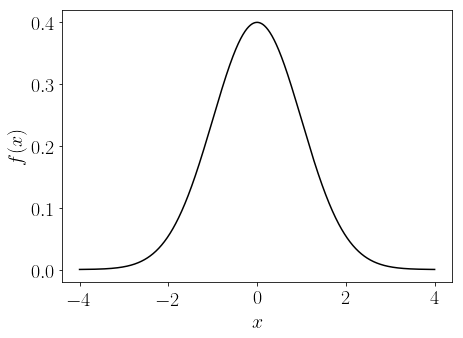

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
x = np.linspace(-4, 4, 1001)
ax.plot(x, norm.pdf(x), 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')

Since the (standard) Normal random variable is symmetric, we anticipate the expected value to be $\mathbb{E}(X) = 0$.  The sample mean estimates $0$ reasonably well from a sample of size $N = 100$.

In [38]:
np.random.seed(350)
N = 100
x = np.random.normal(size=N)
np.mean(x)

-0.1195671488508202

Since we are now dealing with the Normal distribution, the frequencies at specific values of $x$ in the support of $X$ are all equal to 0.  We therefore need to broaden our understanding of the expected value formula.

Our next step will be to think about the expected value formula as defining a new function, $g(x)f(x)$.  With $g(x) = x$, the new function is $x * f(x)$.  This new function is then simply integrated over the support of the random variable $X$.  In the case of the Normal distribution, the support is $(-\infty, \infty)$.

Recall that the Normal distribution's density function $f(x)$ is even, and note that $g(x) = x$ is an odd function.  The product of an even function with an odd function is odd, just the same as an even number plus an odd number is odd.  The plot below displays this new function to be integrated.

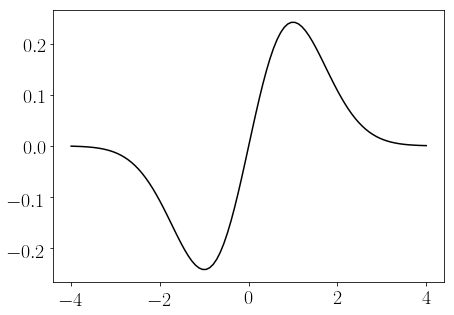

In [55]:
x = np.linspace(-4, 4, 101)
fx = norm.pdf(x)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, x*fx, 'k')

The expected value formula says to integrate the above function over the symmetric (about 0) interval $(-\infty, \infty)$.  Here, since the function is odd and symmetric about $0$, the expected value must be $\mathbb{E}(X) = 0$.  

Notice though that the argument above is rather specific to the $\text{Normal}(0, 1)$ distribution.  More generally, probability mass functions $f$ are not even, nor is the support for an arbitrary random variable $X$ necessarily symmetric about it's mean.

In general, the expected value of a random variable $X \sim \text{Normal}(μ, σ^2)$ is $\mathbb{E}(X) = μ$.  Why?  Imagine changing $\mu$ to $1$, and do try this in the code above.  This shifts the density function $f$ to the right by $1$.  Hence, positive values of $x$ transformed by $g(x) = x$ would receive more weight than negative values of $x$ transformed by $g$.  As positive values receive more weight, the function $xf(x)$ would be greater over positive values.  In this case, the integral of $xf(x)$ with $X \sim \text{Normal}(\mu = 1, \sigma^2 = 1)$ happens to integrate to $1$, such that $\mathbb{E}(X) = \mu = 1$.

What you should take away from this, is that the "new" function $g(x)f(x)$ defined inside the expected value formula is simply a function $g$ of a random variable weighted by the density function $f$.  The function that results from this product is integrated over the support of the random variable $X$.  The integration in the case of a continuous random variable is analogous to a sum for a discrete random variable.  And just as in a standard calculus course, the integral is best thought of as a sum of rectangles who's height is defined by the "new" function $g(x)f(x)$ and who's width is infinitely shrinking.

To reinforce this integral as the continous extension of a sum, let's consider $g(x) = x^2$ with the normal distribution we've been playing with already.  With such a function $g$, we are seeking to calculate $\mathbb{E}(X^2)$, where $X \sim \text{Normal}(0, 1)$.  The plot below shows the "new" function defined by the product of $g$, now even, multiplied by $f$ (still even).  Can you intuit why this function is even?

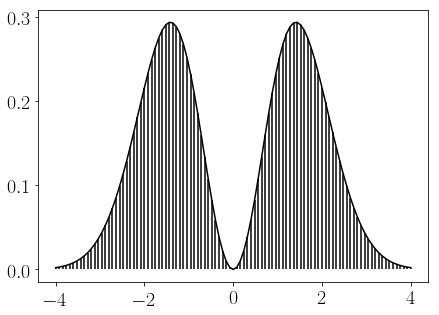

In [40]:
x = np.linspace(-4, 4, 101)
fx = norm.pdf(x)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, x**2 * fx, 'k')
ax.vlines(x, 0, x**2 * fx, 'k')

The vertical lines under the function $x^2f(x)$ are to remind you of your calculus days, when you started learning about integrals by approximating them with rectangles defined by the height of the function of interest.  To spare us the details of integrating $x^2f(x)$ by hand, let's use Python to approximate the area under this function.  The width of the rectangles displayed above is $\Delta = 0.08$.  The calculation below is a reasonable approximation of $\mathbb{E}(X^2) = 1$.

In [58]:
np.sum(.08 * (x**2 * fx)) # approximately integral x^2 f(x) dx

0.999029331822479

# Conclusion

We've seen that the formula for expected value is almost intuitive when seen as an abstraction and generalization of the sample mean.  Expected value is more abstract because it deals with random variables not data and whether or not you sum or integrate depends on the support of the random variable.  The expected value is also more general because it describes general functions applied to random variables, which are then weighted by the appropriate density function.

# Exercises

1. An airline charges the following baggage fees: \\$20 for the first bag and \\$40 for the second -- hence \\$60 total for two bags.  Suppose 45\% of passengers have no checked luggage, 33\% have one piece of checked luggage and 22\% have two pieces. We suppose a negligible portion of people check more than two bags.  Use Python to calculate 
    1. the expected revenue from checked luggage $\mathbb{E}(X)$,

    2. the expected revenue from check luggage in euros, $\mathbb{E}(.87X)$.
    
    3. Simplify the math and your Python code for part B. using the fact that expectation (summation and integration) is linear.

2. Let $X \sim \text{Uniform}(a, b)$.  Calculate by hand $\mathbb{E}(X)$ and $\mathbb{E}(X^2)$.

3. Let $X \sim \text{Exponential}(λ)$. Calculate by hand $\mathbb{E}(X)$. 